In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('pune.csv')

# Convert 'date_time' to datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

# Create a new column for the date only (without the time)
data['date'] = data['date_time'].dt.date

# Group by 'date' and aggregate the necessary columns
# Apply mean for temperature, humidity, etc. and sum for precipitation
aggregated_data = data.groupby('date').agg({
    'tempC': 'mean',        # Average temperature over the day
    'humidity': 'mean',     # Average humidity over the day
    'windspeedKmph': 'mean', # Average wind speed
    'pressure': 'mean',     # Average pressure
    'precipMM': 'sum'       # Total precipitation over the day
}).reset_index()

# Save the aggregated dataset to a new CSV
aggregated_data.to_csv('aggregated_pune_daily.csv', index=False)

aggregated_data.head()


,date,tempC,humidity,windspeedKmph,pressure,precipMM
0,2008-12-11,23.791667,55.708333,4.291667,1012.625000,0.0
1,2008-12-12,24.541667,57.791667,4.333333,1011.708333,0.0
2,2008-12-13,24.416667,52.875000,6.833333,1013.541667,0.0
3,2008-12-14,23.625000,51.500000,7.458333,1014.250000,0.0
4,2008-12-15,23.083333,50.625000,7.750000,1013.458333,0.0


Missing Values in each column:
 date             0
tempC            0
humidity         0
windspeedKmph    0
pressure         0
precipMM         0
dtype: int64


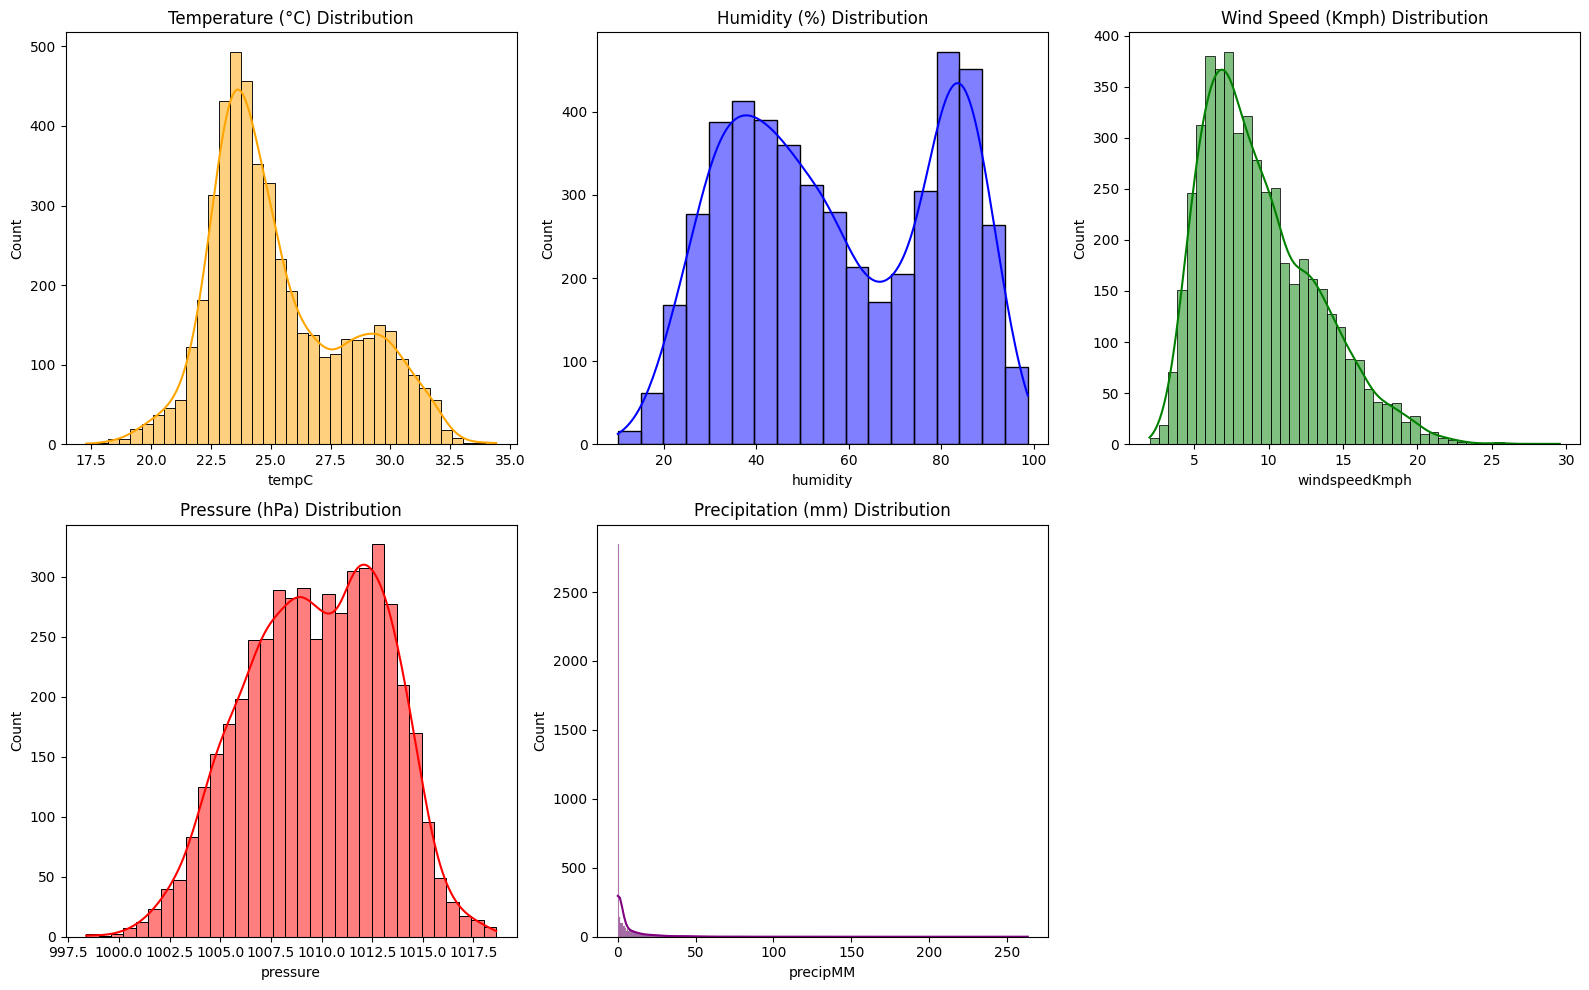

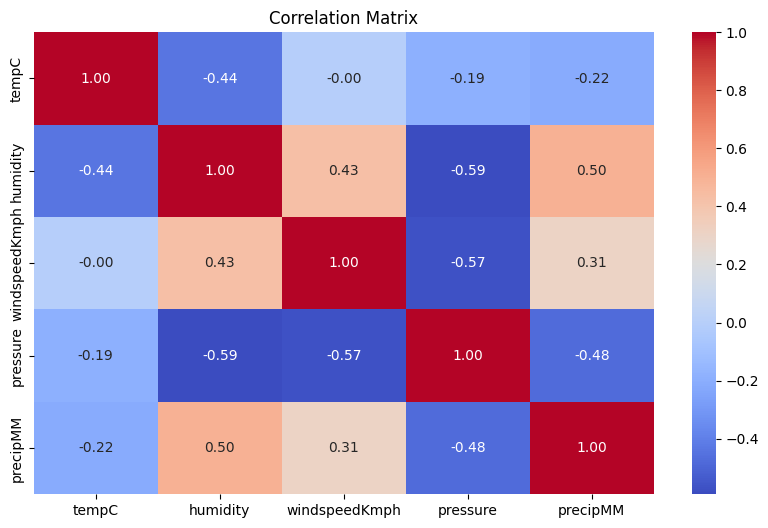

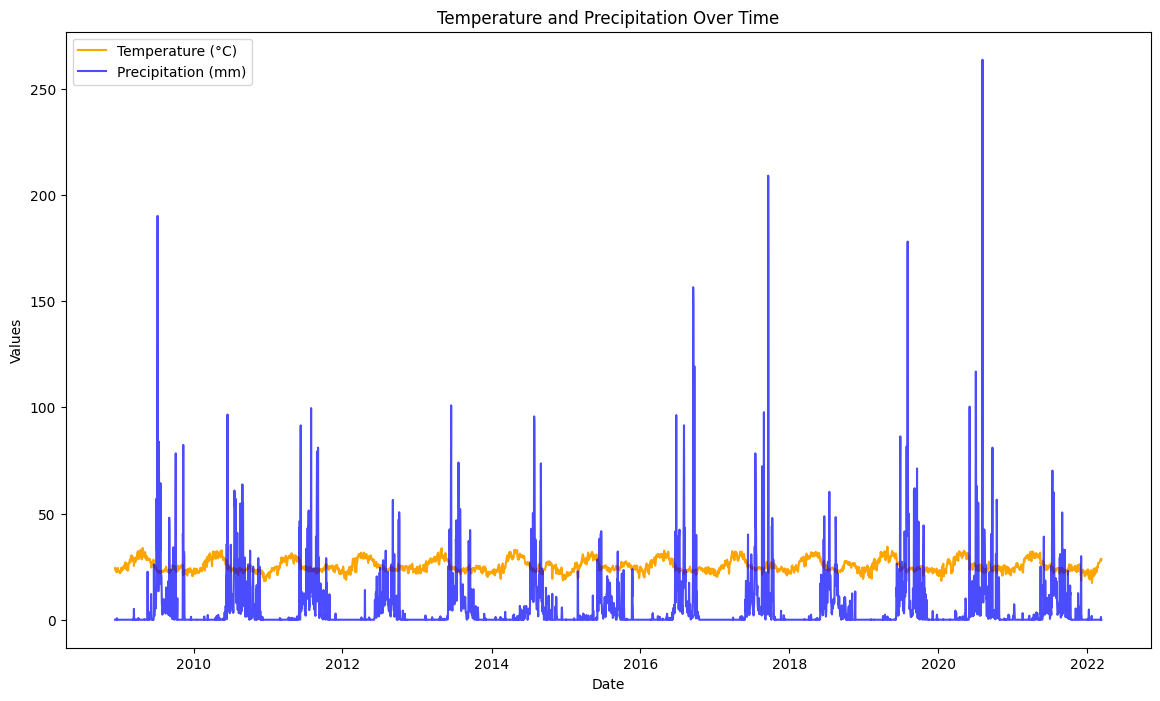

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
aggregated_data = pd.read_csv('aggregated_pune_daily.csv')

# Convert 'date' column to datetime format
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])

# Check for missing values
missing_values = aggregated_data.isnull().sum()
print("Missing Values in each column:\n", missing_values)

# Plot distributions of each numerical variable
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.histplot(aggregated_data['tempC'], kde=True, color='orange')
plt.title('Temperature (°C) Distribution')

plt.subplot(2, 3, 2)
sns.histplot(aggregated_data['humidity'], kde=True, color='blue')
plt.title('Humidity (%) Distribution')

plt.subplot(2, 3, 3)
sns.histplot(aggregated_data['windspeedKmph'], kde=True, color='green')
plt.title('Wind Speed (Kmph) Distribution')

plt.subplot(2, 3, 4)
sns.histplot(aggregated_data['pressure'], kde=True, color='red')
plt.title('Pressure (hPa) Distribution')

plt.subplot(2, 3, 5)
sns.histplot(aggregated_data['precipMM'], kde=True, color='purple')
plt.title('Precipitation (mm) Distribution')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(aggregated_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Time series analysis of key metrics
plt.figure(figsize=(14, 8))
plt.plot(aggregated_data['date'], aggregated_data['tempC'], label='Temperature (°C)', color='orange')
plt.plot(aggregated_data['date'], aggregated_data['precipMM'], label='Precipitation (mm)', color='blue', alpha=0.7)
plt.title('Temperature and Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# Handling outliers (if required)
# You can remove outliers based on IQR, Z-score, or apply some capping techniques, depending on the specific use case.

# If you want to save any results, here’s how you can do it:
# aggregated_data.to_csv('/mnt/data/preprocessed_aggregated_pune_daily.csv', index=False)


C:\Users\91888\AppData\Local\Temp\ipykernel_10692\2727073835.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg = aggregated_data.groupby(temp_bins)['tempC'].mean()
C:\Users\91888\AppData\Local\Temp\ipykernel_10692\2727073835.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_sum = aggregated_data.groupby(rain_bins)['precipMM'].sum()


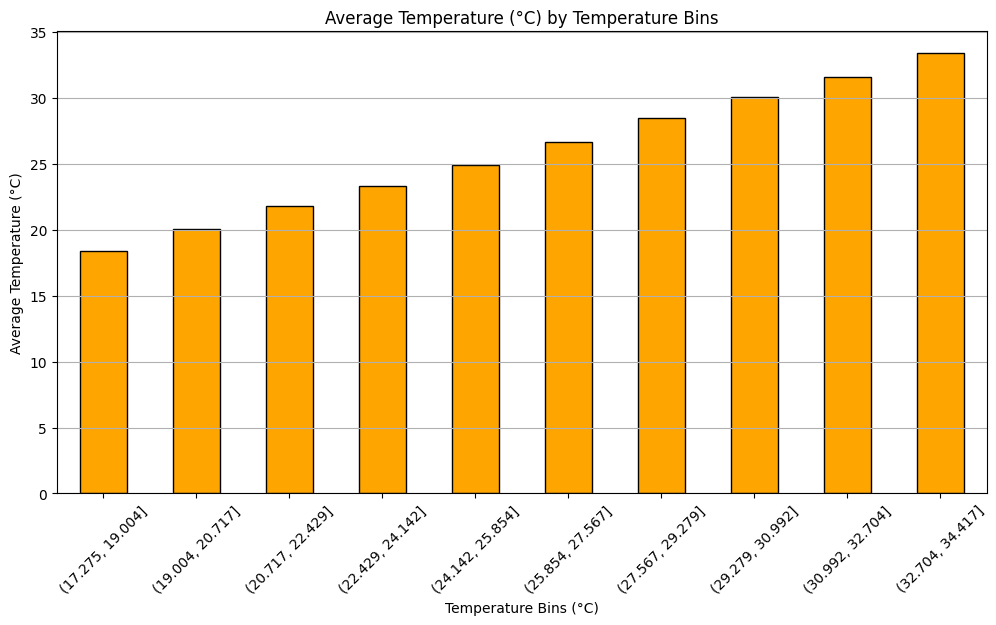

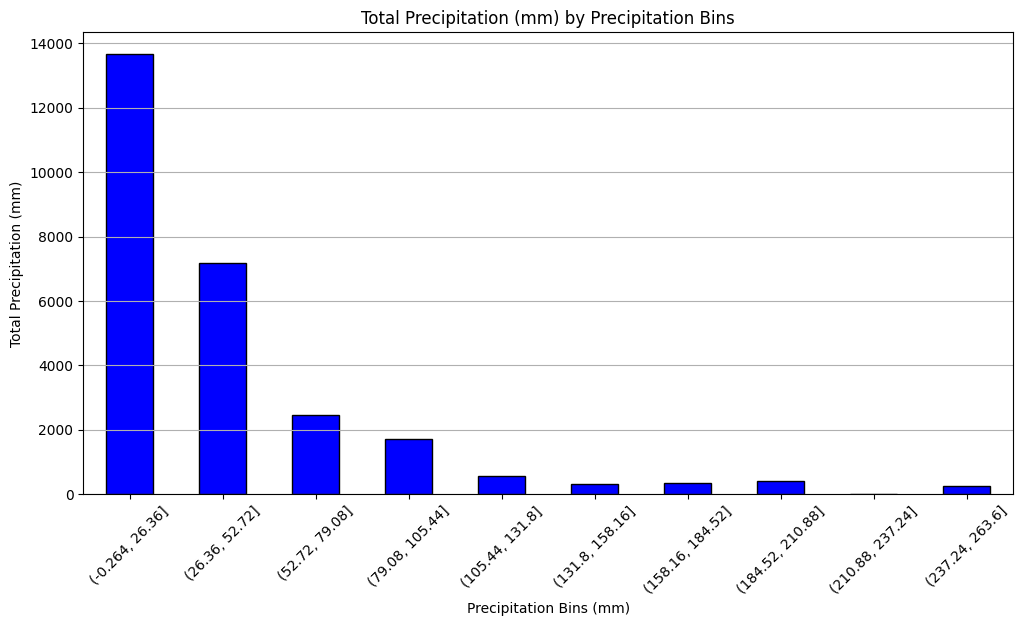

Temperature (°C) Statistics:
 count    4839.000000
mean       25.304720
std         2.862457
min        17.291667
25%        23.291667
50%        24.500000
75%        27.208333
max        34.416667
Name: tempC, dtype: float64

Precipitation (mm) Statistics:
 count    4839.000000
mean        5.561459
std        13.994093
min         0.000000
25%         0.000000
50%         0.000000
75%         4.800000
max       263.600000
Name: precipMM, dtype: float64


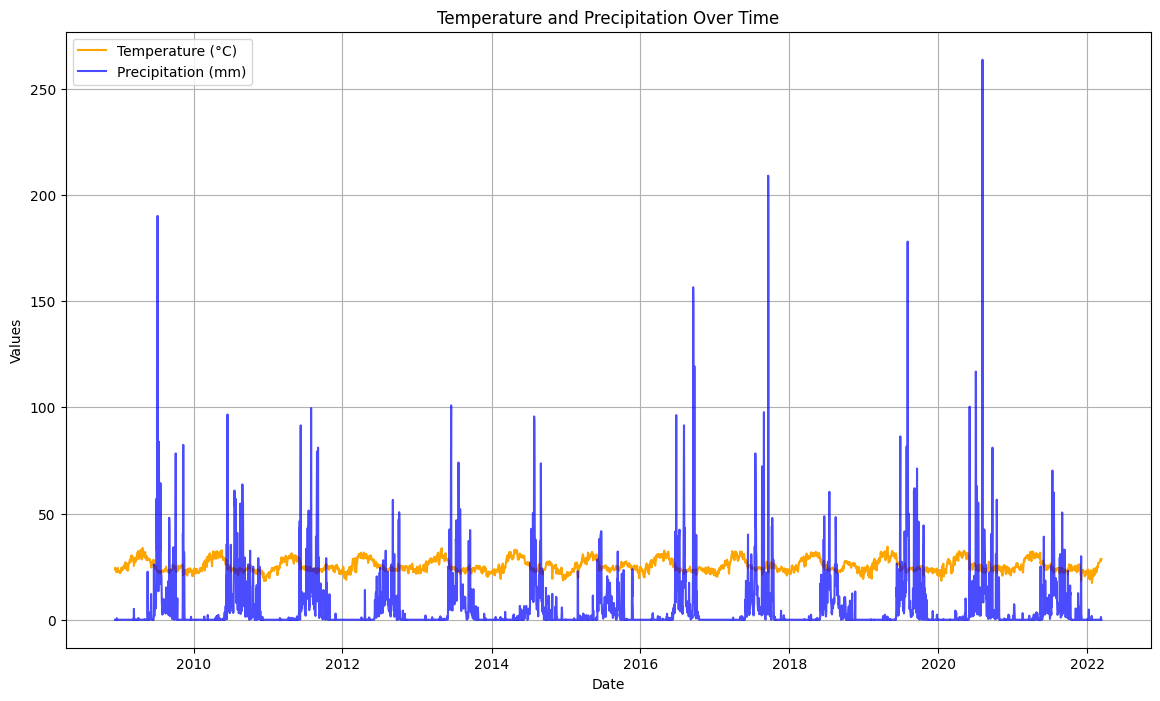

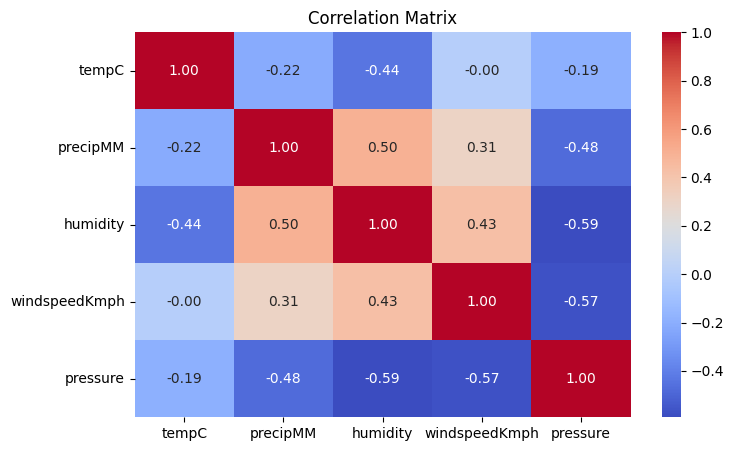

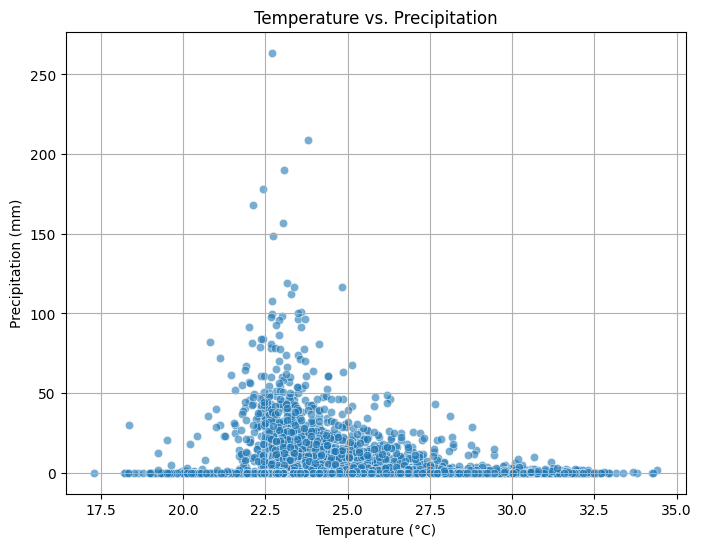

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
aggregated_data = pd.read_csv('aggregated_pune_daily.csv')

# Convert 'date' column to datetime format
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])

# Define bins for temperature and precipitation
temp_bins = pd.cut(aggregated_data['tempC'], bins=10)
rain_bins = pd.cut(aggregated_data['precipMM'], bins=10)

# Aggregate data for bar graphs
temp_avg = aggregated_data.groupby(temp_bins)['tempC'].mean()
rain_sum = aggregated_data.groupby(rain_bins)['precipMM'].sum()

# Bar graph for Average Temperature
plt.figure(figsize=(12, 6))
temp_avg.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Temperature (°C) by Temperature Bins')
plt.xlabel('Temperature Bins (°C)')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Bar graph for Total Precipitation
plt.figure(figsize=(12, 6))
rain_sum.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total Precipitation (mm) by Precipitation Bins')
plt.xlabel('Precipitation Bins (mm)')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Descriptive Statistics for Temperature and Rainfall
temp_stats = aggregated_data['tempC'].describe()
rainfall_stats = aggregated_data['precipMM'].describe()

print("Temperature (°C) Statistics:\n", temp_stats)
print("\nPrecipitation (mm) Statistics:\n", rainfall_stats)

# Time Series Analysis of Temperature and Rainfall
plt.figure(figsize=(14, 8))
plt.plot(aggregated_data['date'], aggregated_data['tempC'], label='Temperature (°C)', color='orange')
plt.plot(aggregated_data['date'], aggregated_data['precipMM'], label='Precipitation (mm)', color='blue', alpha=0.7)
plt.title('Temperature and Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Correlation Analysis
correlation = aggregated_data[['tempC', 'precipMM', 'humidity', 'windspeedKmph', 'pressure']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Relationship Analysis: Temperature vs. Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tempC', y='precipMM', data=aggregated_data, alpha=0.6)
plt.title('Temperature vs. Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.grid()
plt.show()
